In [ ]:
# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(palette="tab10")

In [ ]:
df = pd.read_csv("housing_california.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# the size of the dataset
df.shape

(20640, 10)

# Train-Test Split

In [ ]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
df["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: xlabel='income_cat'>

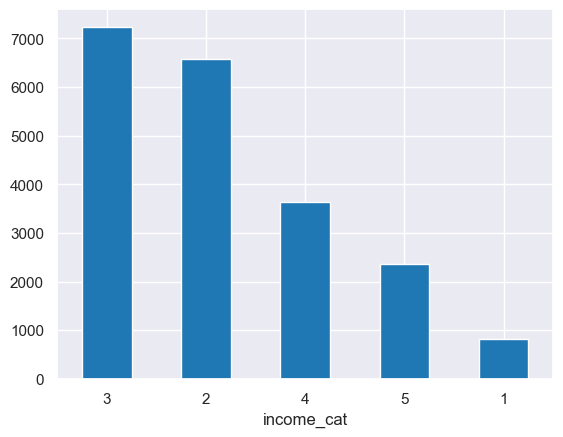

In [ ]:
df["income_cat"].value_counts().plot(kind="bar", rot=0)

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=451,
                                                  stratify=df["income_cat"])

In [ ]:
print(f"{trainset.shape[0]} train and {testset.shape[0]} test instances")

16512 train and 4128 test instances


In [ ]:
trainset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,437500.0,NEAR BAY,3
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,<1H OCEAN,2
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,109400.0,INLAND,2
10545,-117.75,33.71,15.0,2849.0,537.0,878.0,520.0,3.2841,158300.0,<1H OCEAN,3
15816,-122.42,37.76,52.0,1190.0,400.0,1270.0,332.0,2.0329,225000.0,NEAR BAY,2


In [ ]:
testset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9539,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0,INLAND,2
9085,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,INLAND,4
18803,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,INLAND,3
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,<1H OCEAN,1
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,<1H OCEAN,5


In [ ]:
trainset.drop(columns="income_cat", inplace=True)
testset.drop(columns="income_cat", inplace=True)

In [ ]:
trainset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,437500.0,NEAR BAY
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,<1H OCEAN
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,109400.0,INLAND
10545,-117.75,33.71,15.0,2849.0,537.0,878.0,520.0,3.2841,158300.0,<1H OCEAN
15816,-122.42,37.76,52.0,1190.0,400.0,1270.0,332.0,2.0329,225000.0,NEAR BAY


In [ ]:
testset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9539,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0,INLAND
9085,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,INLAND
18803,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,INLAND
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,<1H OCEAN
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,<1H OCEAN


# Missing Values

In [ ]:
trainset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
testset.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        44
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

# Univariate analysis

## Columns and their data types

In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15831 to 19774
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
trainset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.563705,35.627653,28.599079,2635.310623,537.214142,1423.246487,498.696705,3.868177,206513.950884
std,1.999709,2.133329,12.587100,2191.611888,421.379756,1116.568510,382.295489,1.897701,115137.990926
min,-124.300000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.930000,18.000000,1439.000000,295.000000,785.000000,278.000000,2.562500,119400.000000
50%,-118.500000,34.255000,29.000000,2129.000000,434.000000,1165.500000,409.000000,3.534100,179900.000000
75%,-118.010000,37.710000,37.000000,3151.250000,647.000000,1723.250000,606.000000,4.742300,264225.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


In [ ]:
trainset.describe(include=['object'])

,ocean_proximity
count,16512
unique,5
top,<1H OCEAN
freq,7334


## Distribution of categorical variables

<Axes: xlabel='ocean_proximity'>

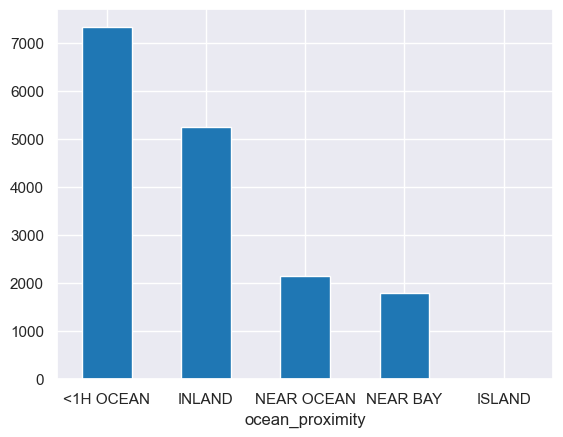

In [ ]:
trainset['ocean_proximity'].value_counts().plot(kind="bar", rot=0)

## Distribution of numerical variables

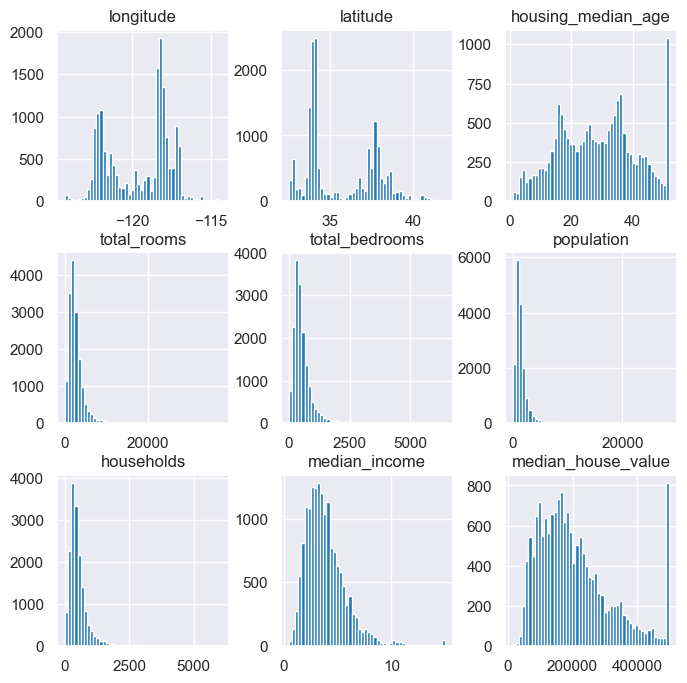

In [ ]:
trainset.hist(bins=50, figsize=(8,8))
plt.show()

## Correlation Matrix

In [ ]:
corr_matrix = trainset.corr(method="pearson", numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.925,-0.105,0.051,0.075,0.105,0.061,-0.014,-0.041
latitude,-0.925,1.000,0.008,-0.044,-0.074,-0.116,-0.078,-0.081,-0.148
housing_median_age,-0.105,0.008,1.000,-0.362,-0.320,-0.299,-0.302,-0.128,0.099
total_rooms,0.051,-0.044,-0.362,1.000,0.931,0.862,0.920,0.205,0.144
total_bedrooms,0.075,-0.074,-0.320,0.931,1.000,0.885,0.980,0.000,0.060
population,0.105,-0.116,-0.299,0.862,0.885,1.000,0.913,0.012,-0.015
households,0.061,-0.078,-0.302,0.920,0.980,0.913,1.000,0.020,0.076
median_income,-0.014,-0.081,-0.128,0.205,0.000,0.012,0.020,1.000,0.688
median_house_value,-0.041,-0.148,0.099,0.144,0.060,-0.015,0.076,0.688,1.000


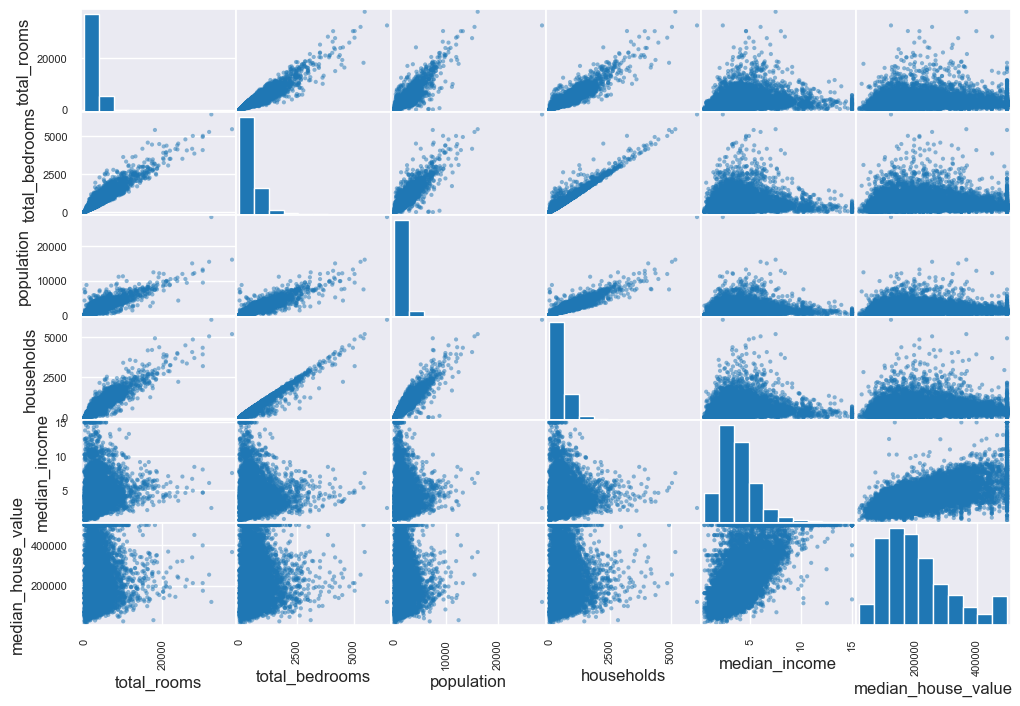

In [ ]:
from pandas.plotting import scatter_matrix

# select only the variables that are most likely to be correlated
vars = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
scatter_matrix(trainset[vars], figsize=(12, 8))
plt.show()

### Correlations with the target variable

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688275
total_rooms           0.144002
housing_median_age    0.099327
households            0.075732
total_bedrooms        0.059620
population           -0.015072
longitude            -0.041475
latitude             -0.147775
Name: median_house_value, dtype: float64

# Handling Missing Values

### Trainset

In [ ]:
from sklearn.linear_model import LinearRegression

# Split data into sets with missing values and without
train_missing = trainset[trainset['total_bedrooms'].isnull()]
train_not_missing = trainset[trainset['total_bedrooms'].notnull()]

# Define features (total_rooms, population, households) and target (total_bedrooms)
features = ['total_rooms', 'population', 'households']
target = 'total_bedrooms'

# Train the model using rows with no missing 'total_bedrooms'
model = LinearRegression()
model.fit(train_not_missing[features], train_not_missing[target])

# Predict missing values using the model
train_predicted = model.predict(train_missing[features])

# Fill in missing values with the predicted values
trainset.loc[trainset['total_bedrooms'].isnull(), 'total_bedrooms'] = train_predicted

In [ ]:
trainset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
trainset["total_bedrooms"].describe()

count    16512.000000
mean       537.190238
std        421.247016
min          1.000000
25%        295.000000
50%        434.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

Before handling missing values, the mean value of "total_bedrooms" is 535.972243, which is very closed to the current mean of 536.160550

### Testset

In [ ]:
testset["total_bedrooms"].describe()

count    4084.000000
mean      540.498286
std       421.447702
min         6.000000
25%       299.750000
50%       438.000000
75%       643.250000
max      6210.000000
Name: total_bedrooms, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

# Split data into sets with missing values and without
test_missing = testset[testset['total_bedrooms'].isnull()]
test_not_missing = testset[testset['total_bedrooms'].notnull()]

# Define features (total_rooms, population, households) and target (total_bedrooms)
features = ['total_rooms', 'population', 'households']
target = 'total_bedrooms'

# Train the model using rows with no missing 'total_bedrooms'
model = LinearRegression()
model.fit(test_not_missing[features], test_not_missing[target])

# Predict missing values using the model
test_predicted = model.predict(test_missing[features])

# Fill in missing values with the predicted values
testset.loc[testset['total_bedrooms'].isnull(), 'total_bedrooms'] = test_predicted

In [ ]:
testset["total_bedrooms"].describe()

count    4128.000000
mean      540.870923
std       421.022260
min         6.000000
25%       299.000000
50%       438.000000
75%       645.250000
max      6210.000000
Name: total_bedrooms, dtype: float64

# Outlier Detection

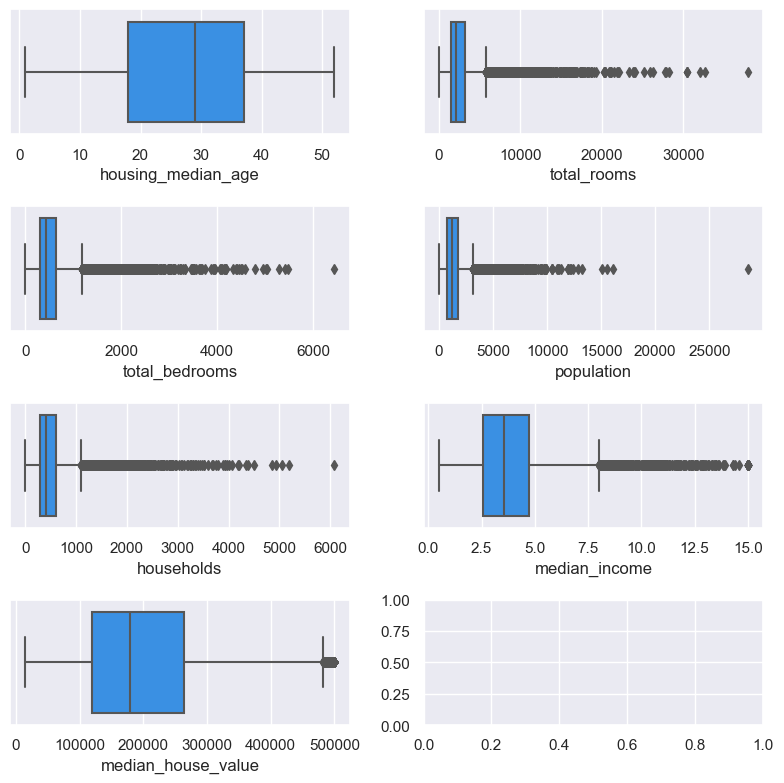

In [ ]:
# Set up the matplotlib figure with 2 rows and 3 columns
fig, axes = plt.subplots(4, 2, figsize=(8, 8))

# Flatten the 2D array of axes to 1D for easy iteration
axes = axes.flatten()

# Columns to plot
num_columns = ['housing_median_age','total_rooms','total_bedrooms','population','households',
               'median_income','median_house_value']

# Create bar plots
for i, col in enumerate(num_columns):
    sns.boxplot(data=trainset, x=col, color='dodgerblue', ax=axes[i])


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Category Encoding

### Trainset

In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15831 to 19774
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [ ]:
# categorical columns to transform
cat_cols = ["ocean_proximity"]

# fit an encoder and transform the trainset
cat_vals = trainset[cat_cols]
cat_vals

,ocean_proximity
15831,NEAR BAY
4281,<1H OCEAN
3291,INLAND
10545,<1H OCEAN
15816,NEAR BAY
...,...
18730,INLAND
16806,NEAR OCEAN
408,NEAR BAY
2065,INLAND


In [ ]:
# Fit and transform the categorical values
transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
# the names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

array(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [ ]:
# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    trainset[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
trainset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,437500.0,NEAR BAY,0.0,0.0,1.0,0.0
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,<1H OCEAN,0.0,0.0,0.0,0.0
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,109400.0,INLAND,1.0,0.0,0.0,0.0
10545,-117.75,33.71,15.0,2849.0,537.0,878.0,520.0,3.2841,158300.0,<1H OCEAN,0.0,0.0,0.0,0.0
15816,-122.42,37.76,52.0,1190.0,400.0,1270.0,332.0,2.0329,225000.0,NEAR BAY,0.0,0.0,1.0,0.0


In [ ]:
# delete the original categorical columns
trainset = trainset.drop(cat_cols, axis=1)

In [ ]:
trainset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,437500.0,0.0,0.0,1.0,0.0
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,0.0,0.0,0.0,0.0
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,109400.0,1.0,0.0,0.0,0.0
10545,-117.75,33.71,15.0,2849.0,537.0,878.0,520.0,3.2841,158300.0,0.0,0.0,0.0,0.0
15816,-122.42,37.76,52.0,1190.0,400.0,1270.0,332.0,2.0329,225000.0,0.0,0.0,1.0,0.0


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15831 to 19774
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   median_house_value          16512 non-null  float64
 9   ocean_proximity_INLAND      16512 non-null  float64
 10  ocean_proximity_ISLAND      16512 non-null  float64
 11  ocean_proximity_NEAR BAY    16512 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(13)
memory usage: 1.8

### Testset

In [ ]:
# transform the testing set using the encoder fitted on trainset
cat_vals = testset[cat_cols]
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    testset[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the testset
testset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9539,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0,INLAND,1.0,0.0,0.0,0.0
9085,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,INLAND,1.0,0.0,0.0,0.0
18803,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,INLAND,1.0,0.0,0.0,0.0
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,<1H OCEAN,0.0,0.0,0.0,0.0
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,<1H OCEAN,0.0,0.0,0.0,0.0


In [ ]:
# delete the original categorical columns
testset = testset.drop(cat_cols, axis=1)

In [ ]:
testset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9539,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0,1.0,0.0,0.0,0.0
9085,-118.17,34.67,5.0,8352.0,1555.0,3723.0,1389.0,4.5659,140300.0,1.0,0.0,0.0,0.0
18803,-122.06,40.55,17.0,3057.0,577.0,1497.0,556.0,3.5189,101000.0,1.0,0.0,0.0,0.0
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,0.0,0.0,0.0,0.0
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,0.0,0.0,0.0,0.0


In [ ]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 9539 to 6229
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4128 non-null   float64
 1   latitude                    4128 non-null   float64
 2   housing_median_age          4128 non-null   float64
 3   total_rooms                 4128 non-null   float64
 4   total_bedrooms              4128 non-null   float64
 5   population                  4128 non-null   float64
 6   households                  4128 non-null   float64
 7   median_income               4128 non-null   float64
 8   median_house_value          4128 non-null   float64
 9   ocean_proximity_INLAND      4128 non-null   float64
 10  ocean_proximity_ISLAND      4128 non-null   float64
 11  ocean_proximity_NEAR BAY    4128 non-null   float64
 12  ocean_proximity_NEAR OCEAN  4128 non-null   float64
dtypes: float64(13)
memory usage: 451.5 

In [ ]:
ytrain = trainset["median_house_value"]
Xtrain = trainset.drop(columns="median_house_value")
ytest = testset["median_house_value"]
Xtest = testset.drop(columns="median_house_value")

In [ ]:
Xtrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,0.0,0.0,1.0,0.0
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,0.0,0.0,0.0,0.0
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,1.0,0.0,0.0,0.0
10545,-117.75,33.71,15.0,2849.0,537.0,878.0,520.0,3.2841,0.0,0.0,0.0,0.0
15816,-122.42,37.76,52.0,1190.0,400.0,1270.0,332.0,2.0329,0.0,0.0,1.0,0.0


In [ ]:
ytrain.head()

15831    437500.0
4281     175000.0
3291     109400.0
10545    158300.0
15816    225000.0
Name: median_house_value, dtype: float64

In [ ]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((16512, 12), (16512,), (4128, 12), (4128,))

In [ ]:
import os

# Get the link to desktop
if os.name == 'nt':
    desktop_path = os.path.join(os.environ['USERPROFILE'], 'Desktop')
else:
    desktop_path = os.path.join(os.environ['HOME'], 'Desktop')

# File paths for storing the data
Xtrain_file_path = os.path.join(desktop_path, 'Xtrain.xlsx')
Xtest_file_path = os.path.join(desktop_path, 'Xtest.xlsx')
ytrain_file_path = os.path.join(desktop_path, 'ytrain.xlsx')
ytest_file_path = os.path.join(desktop_path, 'ytest.xlsx')

# Save DataFrames to Excel files
Xtrain.to_excel(Xtrain_file_path, index=False)
Xtest.to_excel(Xtest_file_path, index=False)
ytrain.to_excel(ytrain_file_path, index=False)
ytest.to_excel(ytest_file_path, index=False)

# **Model Development**

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

## Baseline

In [ ]:
median_price = ytrain.median()
median_price

179900.0

In [ ]:
# The median price is the predicted value of all observations
yhat = np.full((ytrain.shape[0], 1), median_price)
yhat[:10]

array([[179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.],
       [179900.]])

In [ ]:
baseline_training_mse = mean_squared_error(ytrain, yhat)
baseline_training_mse = np.sqrt(baseline_training_mse)
baseline_training_mse

118170.45519192459

In [ ]:
yhat = np.full((ytest.shape[0], 1), median_price)

baseline_test_mse = mean_squared_error(ytest, yhat)
baseline_test_mse = np.sqrt(baseline_test_mse)
baseline_test_mse

119806.38300674314

## 1. Linear Regression

#### Cross-Validation

In [ ]:
lin_reg = LinearRegression()
rmse_scores = -cross_val_score(lin_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
rmse_scores

array([67912.70845325, 72146.8203893 , 69156.56825705, 67778.92781162,
       70712.66477363, 68441.73329903, 67871.81987675, 65790.43427563,
       67654.82258518, 65393.71527723])

In [ ]:
rmse_scores.mean(), rmse_scores.std()

(68286.0214998675, 1927.079034102347)

#### Fit the model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
# predictions
lin_yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, lin_yhat)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68221.65978261971

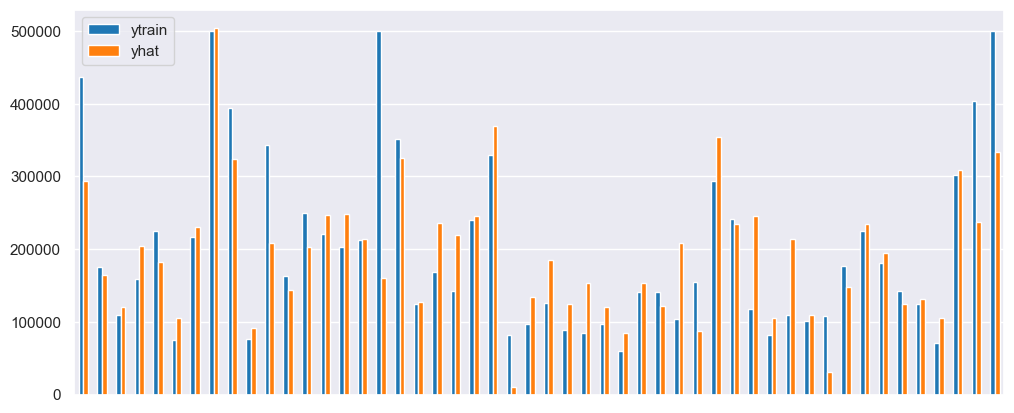

In [ ]:
# Create a temporary dataframe containing two columns
lin_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": lin_yhat[:50]})

# Plot the dataframe
ax = lin_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Remove x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

## 2. Decision Tree

#### Cross-Validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=451)

tree_rmse_scores = -cross_val_score(tree_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error",
                               cv=10)

In [ ]:
tree_rmse_scores

array([65129.16821198, 70922.32588288, 66613.66455761, 66552.89205302,
       69766.36005929, 67740.68080479, 72678.37806197, 65845.85031013,
       65704.12074704, 64018.17954653])

In [ ]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(67497.16202352496, 2628.8792846577358)

#### Fit the model

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=451)
tree_reg.fit(Xtrain, ytrain)


DecisionTreeRegressor(random_state=451)

In [ ]:
# predictions
tree_yhat = tree_reg.predict(Xtrain)
tree_mse = mean_squared_error(ytrain, tree_yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

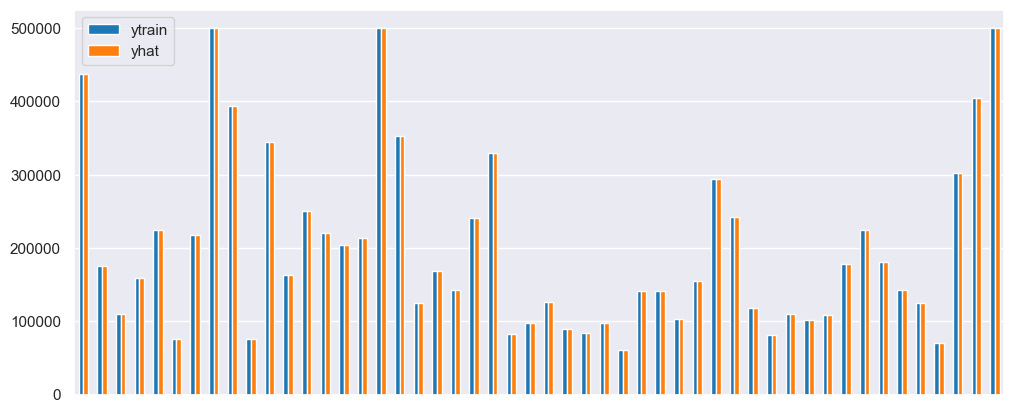

In [ ]:
# Create a temporary dataframe containing two columns
tree_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": tree_yhat[:50]})

# Plot the dataframe
ax = tree_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Remove x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

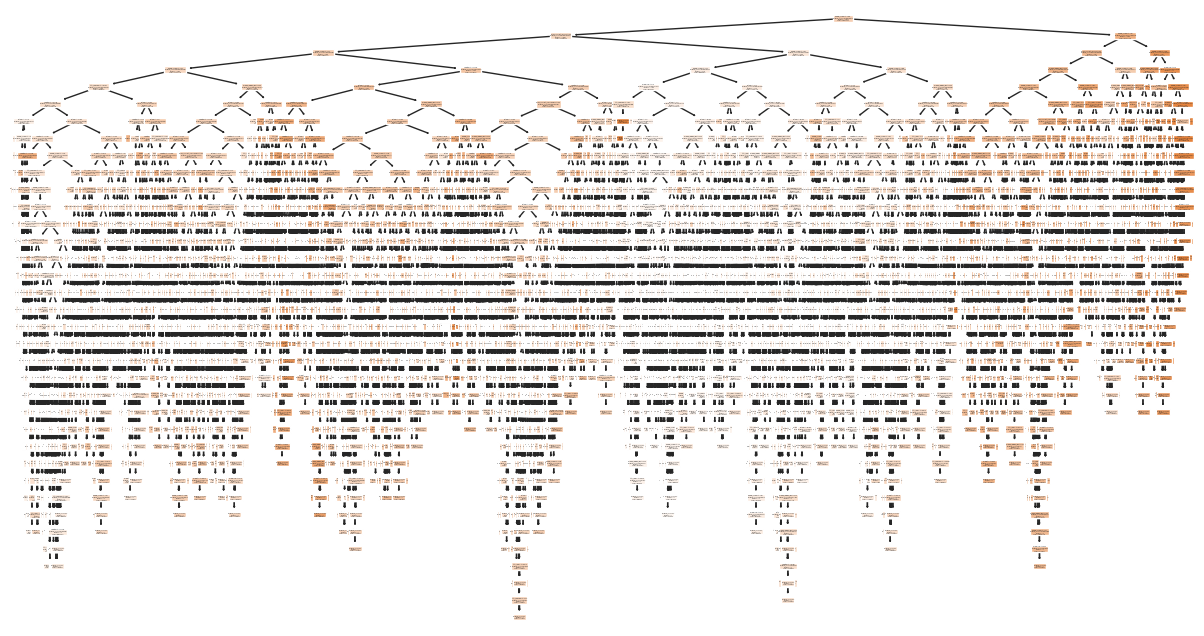

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(tree_reg, filled=True, feature_names=Xtrain.columns, class_names=True)
plt.show()

## 3. Random Forest

#### Cross Validation

In [ ]:
rf_reg = RandomForestRegressor(random_state=451)

rf_rmse_scores = -cross_val_score(rf_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error",
                               cv=10)

In [ ]:
rf_rmse_scores

array([46957.38689952, 52297.0176208 , 48422.27876419, 49417.05662882,
       48978.36229682, 48656.37418879, 49075.34866087, 47833.12183818,
       46849.66213824, 47236.60988298])

In [ ]:
rf_rmse_scores.mean(), rf_rmse_scores.std()

(48572.32189192064, 1514.6132332998452)

#### Fit the model

In [ ]:
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=451)

In [ ]:
# make predictions
rf_yhat = rf_reg.predict(Xtrain)
rf_mse = mean_squared_error(ytrain, rf_yhat)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18131.30179887972

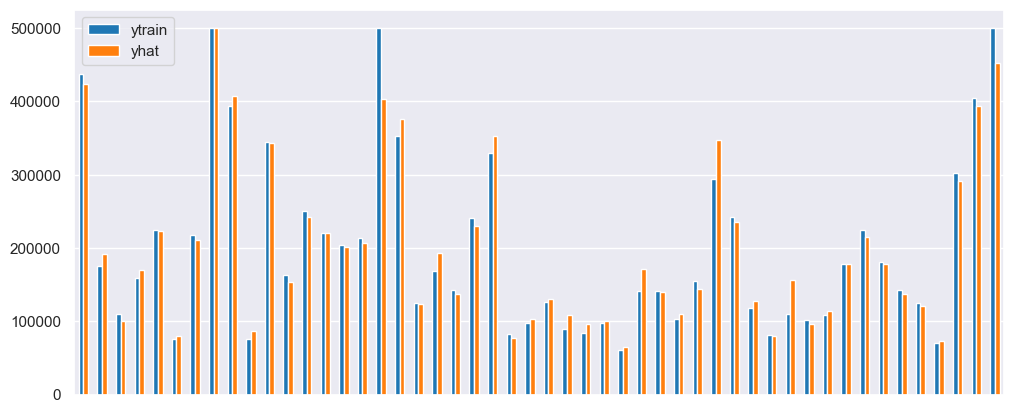

In [ ]:
# Create a temporary dataframe containing two columns
rf_tmp = pd.DataFrame({"ytrain": ytrain[:50], "yhat": rf_yhat[:50]})

# Plot the dataframe
ax = rf_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Remove x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

## Final Model - Random Forest

In [ ]:
# make predictions
yhat = rf_reg.predict(Xtest)
mse = mean_squared_error(ytest, yhat)
rmse = np.sqrt(mse)
rmse

50633.08046550466

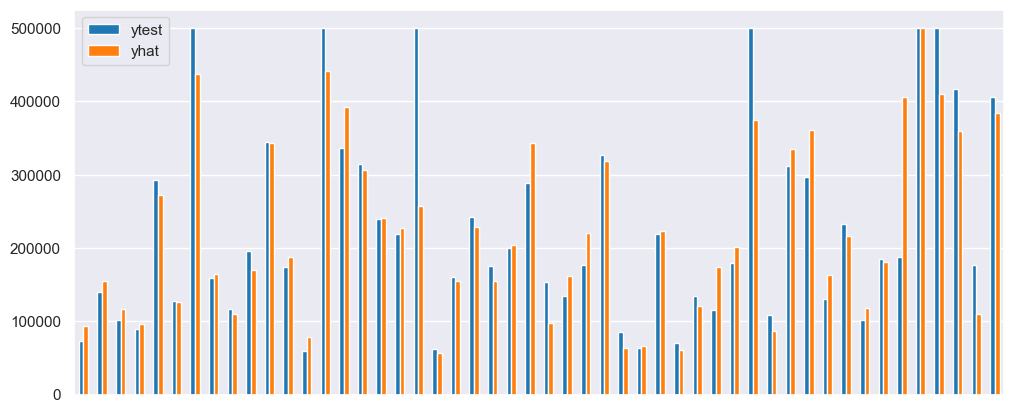

In [ ]:
# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": yhat[:50]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Remove x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

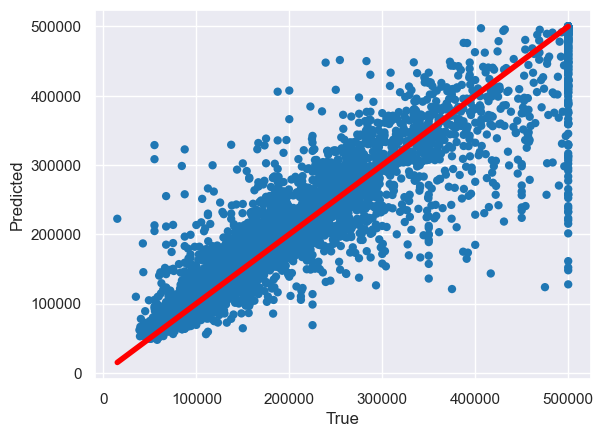

In [ ]:
fig,ax = plt.subplots()
ax.scatter(ytest, yhat, edgecolors="None")
ax.plot([ytest.min(), ytest.max()],[ytest.min(), ytest.max()],'r',lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

# **Citing this notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main